# HR Analytics Capstone Project

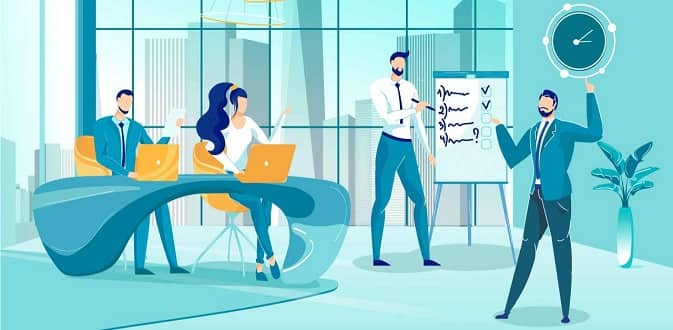

In [ ]:
from IPython.display import Image
Image(filename='projectimg.jpeg',width=750)

## understanding the Problem and the dataset

 Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.
                                             
                                             This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.


**Problem statement: how salary is varying with respect to other considerable factors.**

### Features description:

1.	Gender - talks of the gender - Male or female
2.	Business - if the person has a business or no
3.	Age - age of the person
4.	Salary - CTC of the employee
5.	Dependants - number of people dependant on the person
6.	Months - duration of the person employed with the company
7.	Calls - if the person has authority to make calls or not
8.	Type - salary settlement type
9.	Billing - Subscribed to billing plans or no
10.	Unit sales - unit sale made by the person
11.	Total sales - total sales made by the person
12.	Rating - If he has been given a rating by a superior or no
13.	Bonus - amount received by a person as bonus for sales
14.	Base pay - Base pay of the employee
15.	Unit price - The Unit price of a sale
16.	Volume - volume allotted to a person
17.	Opening balance - The opening balance of an employee
18.	Low - lowest balance allotted to a person.
19.	Closing Balance- The closing balance of an employee
20.	Education- Educational background of an employee


### Importing required libraries

In [1]:
pip install pingouin

  Using cached pingouin-0.5.0.tar.gz (182 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached xarray-0.21.1-py3-none-any.whl (865 kB)
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=db61d7a98e4ab5ddd86d6f24cc66e393798015845bd480004f151148b6900ad3
  Stored in directory: c:\users\kashm\appdata\local\pip\cache\wheels\ac\42\e9\bd0edc18701d9b7ab4b09be127909823f131054f35373abc0c
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=ce059f6d647d098aff78eb3ee57ac71ddfc37597ea67ffd3139a71db399fd8d4
  Stored in directory: c:\users\kashm\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packag

In [3]:
import pandas as pd                                 #for creating dataframe works & calc. also
import numpy as np                                  #for numerical calculations
import matplotlib.pyplot as plt                     #visualization purpose
%matplotlib inline                     
import seaborn as sns                               #visualization purpose
import pingouin as pg                               #plots and normality status of different features
from scipy import stats                             #for different calculations

import warnings                                     #to ignore unnecessary warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)            #setting the default figure size for all plots
sns.set_style('darkgrid')                           #style of the plots throughout the project

### Loading the dataset

In [4]:
Hr_data=pd.read_csv('New_data_Set.csv')             #reading the csv file using pandas library and storing it under name 'df'

#top 5 rows using head() function
Hr_data.head(10)                                    

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00000,2035.600000,254.450000,3.77,21226600,3.7500,3.760,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12000,2279.248000,284.906000,3.74,10462800,3.8500,3.680,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65000,2358.660000,294.832500,3.89,18761000,4.2300,4.290,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12000,2450.048000,306.256000,4.35,66130600,4.2600,4.310,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00000,2498.000000,312.250000,4.34,26868200,4.7900,4.410,4.08,18.80,19.05,1,High School or less
5,Male,0,No,Yes,Two year,Yes,No,23,6444.23000,2577.692000,322.211500,4.37,29869600,5.8800,5.040,4.13,18.80,19.1,1,High School or less
6,Male,0,Yes,No,Two year,Yes,No,23,6455.50000,2582.200000,322.775000,4.42,25239200,6.0925,5.590,4.15,18.80,19.1,1,High School or less
7,Female,0,No,Yes,One year,Yes,No,24,6458.35722,2583.342888,322.917861,4.44,28307500,6.1000,5.670,4.21,18.80,19.15,1,Intermediate
8,Female,1,No,Yes,Month-to-month,Yes,Yes,24,6529.23000,2611.692000,326.461500,4.45,24295600,6.1500,6.170,4.27,18.85,19.2,1,Intermediate
9,Male,0,No,Yes,Month-to-month,Yes,No,43,6682.33000,2672.932000,334.116500,4.41,17671600,6.2600,6.095,4.22,18.85,19.2,1,Intermediate


In [5]:
#bottom 5 rows of dataset using tail() function
Hr_data.tail()     

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


In [6]:
#Shape of dataset
Hr_data.shape      

(5000, 20)

##Summary:

Here in this dataset, there are 5000 rows with 20 features, Out of which **8 are categorical features** and **12 are numerical features** .This data based on Hr department for deciding the salary using different factors available. We need to perform data cleansing, data pre processing and Eda part to visualize the inferences from the data to make data driven decision.

In [7]:
#features or columns we have in our dataset
Hr_data.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Salary', 'Base_pay', 'Bonus', 'Unit_Price', 'Volume',
       'openingbalance', 'closingbalance', 'low', 'Unit_Sales', 'Total_Sales',
       'Months', 'Education'],
      dtype='object')

In [8]:
def printinfo():       #creating a user defined function instead using Hr_data.info()
    temp = pd.DataFrame(index=Hr_data.columns)        #creating a dataframe with the available dataset columns of Hr_data
    temp['data_type'] =Hr_data.dtypes                 #creating a data type column using .dtypes
    temp['null_count'] =Hr_data.isnull().sum()        #creating a column null count and finding null values using isnull().sum()
    temp['unique_count'] =Hr_data.nunique()           #creating a unique count column for no of unique values in the dataset.
    return temp        #returns the dataframe created by the function

In [9]:
printinfo()                                           #Calling out the function created above or instancing the function

,data_type,null_count,unique_count
Gender,object,0,2
Business,int64,0,2
Dependancies,object,0,2
Calls,object,0,2
Type,object,0,3
Billing,object,0,2
Rating,object,0,2
Age,int64,0,65
Salary,float64,0,5000
Base_pay,float64,23,4883


From the above printinfo() function,it is clear that we have null values only in 3 columns Base_Pay(23) ,openingbalance(1476) and Total_Sales(8).Also we have the unique_count values for each of the column and Total_Sales column is a numerical column but it is in **"object"** data type, so we need to fix it and convert into **numerical** column for calculation purpose. 

In [10]:
# unique values in each columns
for x in Hr_data.columns:
    #prinfting unique values
    print(x ,':', len(Hr_data[x].unique()))

Gender : 2
Business : 2
Dependancies : 2
Calls : 2
Type : 3
Billing : 2
Rating : 2
Age : 65
Salary : 5000
Base_pay : 4884
Bonus : 5000
Unit_Price : 3836
Volume : 4831
openingbalance : 2987
closingbalance : 4011
low : 4014
Unit_Sales : 1434
Total_Sales : 4707
Months : 73
Education : 4


In [11]:
                                                    #prints unique values in Gender column
print('unique values in Gender:',Hr_data['Gender'].unique()) 
print()                                             #prints unique values in Dependancy column
print('unique values in Dependancies:',Hr_data['Dependancies'].unique())
print()                                             #prints unique values in Business column
print('unique values in Business:',Hr_data['Business'].unique())
print()                                             #prints unique values in calls column
print('unique values in Calls:',Hr_data['Calls'].unique())
print()                                             #prints unique values in Billing column
print('unique values in Billing:',Hr_data['Billing'].unique())
print()                                             #prints unique values in Rating column
print('unique values in Rating:',Hr_data['Rating'].unique())
print()                                             #prints unique values in Type column
print('unique values in Type:',Hr_data['Type'].unique())
print()                                             #prints unique values in Education column
print('unique values in Education:',Hr_data['Education'].unique())

unique values in Gender: ['Female' 'Male']

unique values in Dependancies: ['No' 'Yes']

unique values in Business: [0 1]

unique values in Calls: ['Yes' 'No']

unique values in Billing: ['No' 'Yes']

unique values in Rating: ['Yes' 'No']

unique values in Type: ['Month-to-month' 'Two year' 'One year']

unique values in Education: ['High School or less' 'Intermediate' 'Graduation' 'PG']


In [12]:
#Converting the data type of Total_Sales column to numeric data type

Hr_data['Total_Sales']=pd.to_numeric(Hr_data['Total_Sales'],errors='coerce')
                                  #coerce will convert the string values to nan values and get parsed to numeric data type
Hr_data['Total_Sales'].dtypes     #data type of Total_Sales column.

dtype('float64')

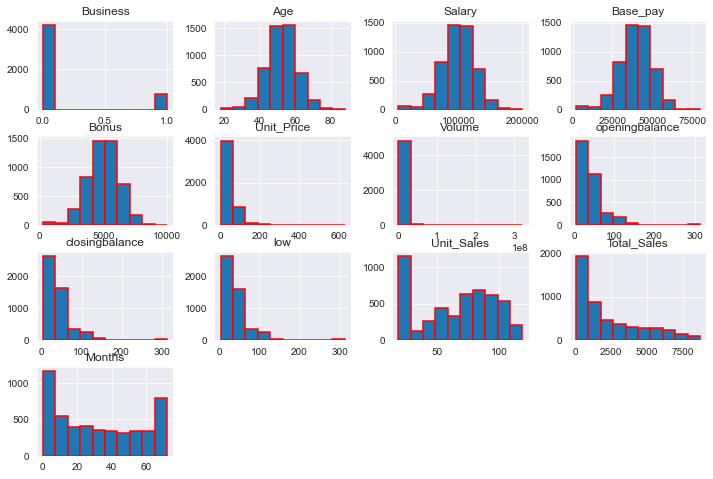

In [13]:
#Distribution of each columns in the dataset using histogram
Hr_data.hist(edgecolor = 'Red', linewidth = 1.5,bins=10); 

#from the histogram- Bonus,Salary,Base_pay seems to be normally distributed and rest all features are either left skewed or right skewed. But from visualization it is not clear enough because of the edge of the bell shaped curves is at some height, So we will look at the statistical methods to decide.

In [14]:
pg.normality(Hr_data)               #Normality status of different columns of Hr_data and'p value' of each column using pingouin

,W,pval,normal
Business,0.440457,0.000000e+00,False
Age,0.990820,1.691929e-17,False
Salary,0.987062,5.151529e-21,False
Base_pay,0.986639,2.593437e-21,False
Bonus,0.987062,5.151529e-21,False
Unit_Price,0.553489,0.000000e+00,False
Volume,0.326129,0.000000e+00,False
openingbalance,0.696258,0.000000e+00,False
closingbalance,0.709553,0.000000e+00,False
low,0.709145,0.000000e+00,False


From the p-value it is clear that the **p-value < 0.05**,which implies that we can reject our null hypothesis.
  Hence,'none' of the [data features] are normally distributed.

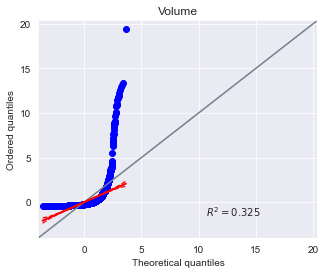

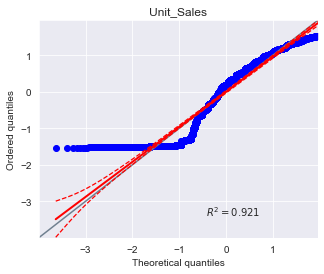

In [15]:
pg.qqplot(Hr_data['Volume']);                     #Using pingouin,created a QQ-plot to see the normality of volume feature
plt.title('Volume'); #title of plot

pg.qqplot(Hr_data['Unit_Sales']);                 #Using pingouin,created a QQ-plot to see the normality of Unit_Sales feature
plt.title('Unit_Sales'); #title of the plot

the data points from the QQ-plot clearly not lies in the line for the tested two columns ,So from visualization ,It is clear that no features are normally distributed. 

In [16]:
#null values location of Total_Sales column using isnull()
print('Null values in this column are:',Hr_data['Total_Sales'].isnull().sum())  #prints no of null values in Total_Sales
Hr_data[Hr_data['Total_Sales'].isnull()].head()                                 #location of nan values in dataset

Null values in this column are: 16


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
37,Male,0,Yes,Yes,Two year,No,No,36,14255.38723,5702.154893,712.769361,15.520000,7382800,11.690000,9.522500,5.972495,19.15,NaN,1,Intermediate
97,Male,0,No,Yes,One year,Yes,No,40,44345.31312,17738.125250,2217.265656,8.000000,4030400,18.480000,13.810000,7.860000,19.35,NaN,1,Graduation
170,Female,0,Yes,Yes,Month-to-month,Yes,No,44,53060.77283,21224.309130,2653.038642,23.750000,18331000,24.770000,17.969999,9.785354,19.50,NaN,3,Graduation
227,Male,0,Yes,Yes,One year,No,No,45,56953.47245,22781.388980,2847.673623,43.560001,4062000,29.648559,20.809999,10.725001,19.60,NaN,5,PG
315,Male,0,No,Yes,Month-to-month,No,No,47,61039.17076,24415.668310,3051.958538,23.750000,21862600,37.459999,23.930000,11.455000,19.75,NaN,8,Graduation


### filling of null values using statistical measures and removing null values.

In [17]:
Hr_data.isnull().sum()                             #null values present in the dataset

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

In [18]:
Hr_data.dropna(subset=['Base_pay','Total_Sales'],inplace=True)      
                                                  #dropping null values from the two columns because they are very less in no.

In [19]:
Ob=Hr_data['openingbalance'].median()             #calculating median values of openingbalance Column
print('the median value of openingbalance:',Ob)   #prints median of openingbalance

the median value of openingbalance: 33.32


In [20]:
Hr_data['openingbalance'].fillna(Ob,inplace=True) #filling nan values with median value of openingbalance Column

In [21]:
printinfo()                                       #recalling of user defined function for checking null values
                                   
# there are no null valuespresent now and the object type of Total_Sales is also changed now.

,data_type,null_count,unique_count
Gender,object,0,2
Business,int64,0,2
Dependancies,object,0,2
Calls,object,0,2
Type,object,0,3
Billing,object,0,2
Rating,object,0,2
Age,int64,0,65
Salary,float64,0,4961
Base_pay,float64,0,4868


### Duplicated entries in the dataset 

In [22]:
Hr_data.duplicated().sum()                        #Duplicate values using duplicated() function 

0

We can see there is no duplicated entries in the dataset, if it would have duplicates then we had to remove it.

In [23]:
Hr_data.describe()                                #Statistical description of the dataset using describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
count,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4.961000e+03,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000,4961.000000
mean,0.160250,51.881072,99958.298698,40008.895192,4997.914935,50.617058,6.762826e+06,40.913596,43.350737,42.780688,64.995253,2282.786192,32.280589
std,0.366875,8.509788,24946.716919,10031.682829,1247.335846,48.096732,1.626007e+07,32.660123,35.986575,35.219401,29.978967,2267.794344,24.569804
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.250000,18.800000,0.000000
25%,0.000000,47.000000,84302.567720,33721.027090,4215.128386,25.840000,1.279900e+06,26.600000,22.100000,21.850000,36.000000,399.600000,9.000000
50%,0.000000,52.000000,100667.831800,40267.132730,5033.391590,39.310001,2.860300e+06,33.320000,33.380001,32.982074,70.550000,1404.650000,29.000000
75%,0.000000,57.000000,116911.794500,46764.717780,5845.589725,58.700001,6.205100e+06,42.740002,51.139999,50.410000,89.950000,3767.400000,55.000000
max,1.000000,88.000000,169149.707000,72278.720000,8457.485350,610.001045,3.208684e+08,313.903904,313.688694,307.399994,117.150000,8684.800000,72.000000


##Feature **engineering**

In [24]:
Hr_data.head(3)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less


In [25]:
Hr_data['gross_salary']=Hr_data['Base_pay']+Hr_data['Bonus']+Hr_data['Salary']

In [26]:
Hr_data.head(3)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,...,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education,gross_salary
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,...,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less,7379.0500
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,...,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less,8262.2740
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,...,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less,8550.1425


In [27]:
Hr_data.drop(columns=['Salary','Base_pay','Bonus'],axis=1,inplace=True)

### Correlation of nominal and numerical data features 

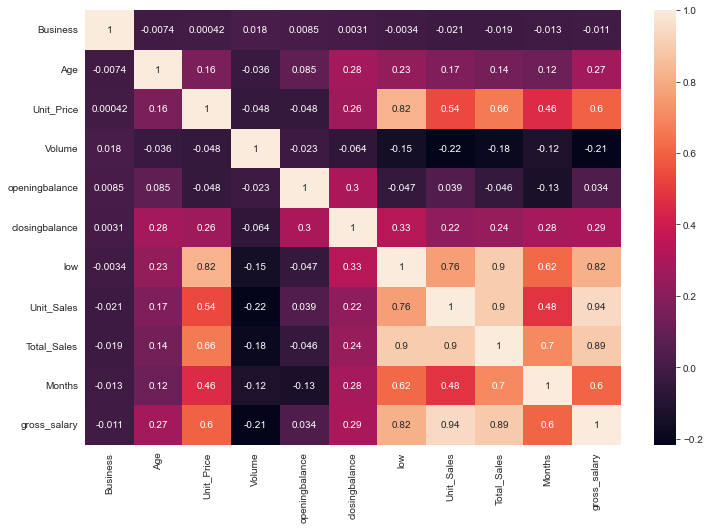

In [28]:
corr=Hr_data.corr()
sns.heatmap(corr,annot=True);
                                                  #prints correlation table of numerical features

In [29]:
Hr_data.shape                                       #shape of dataset

(4961, 18)

In [30]:
Hr_data.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months',
       'Education', 'gross_salary'],
      dtype='object')

In [31]:
box=Hr_data[['Age','Unit_Price','openingbalance','closingbalance','low','Total_Sales','Months','gross_salary']] 
                                                   #removing only volume column for boxplot: better visualization

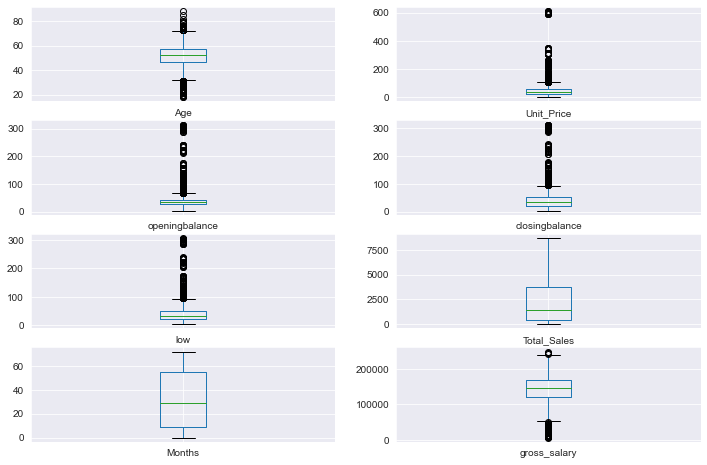

In [32]:
fig, axes = plt.subplots(4,2)
for i,el in enumerate(list(box.columns.values)):
    a = box.boxplot(el, ax=axes.flatten()[i])

plt.show()


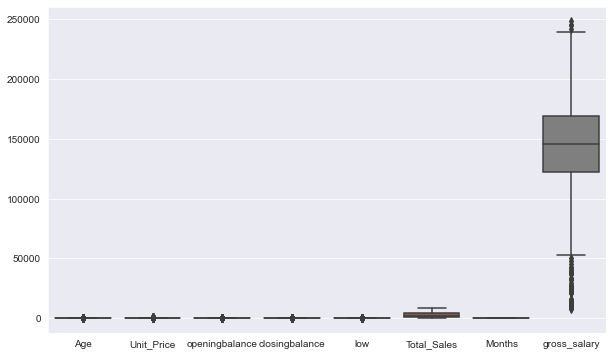

In [33]:
plt.figure(figsize=(10,6))                         #sets the figure size
sns.boxplot(data=box);                             #plotting the box plot after removing the outliers using seaborn

Outliers detection and removal using IQR **method**

In [34]:
Hr_data['Age'].shape

(4961,)

In [35]:
Q1 = Hr_data['Age'].quantile(0.25)
Q3 = Hr_data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = Hr_data.query('(@Q1 - 1.5 * @IQR) <= Age <= (@Q3 + 1.5 * @IQR)')
filtered.shape

(4850, 18)

Text(0.5, 1.0, 'with outliers')

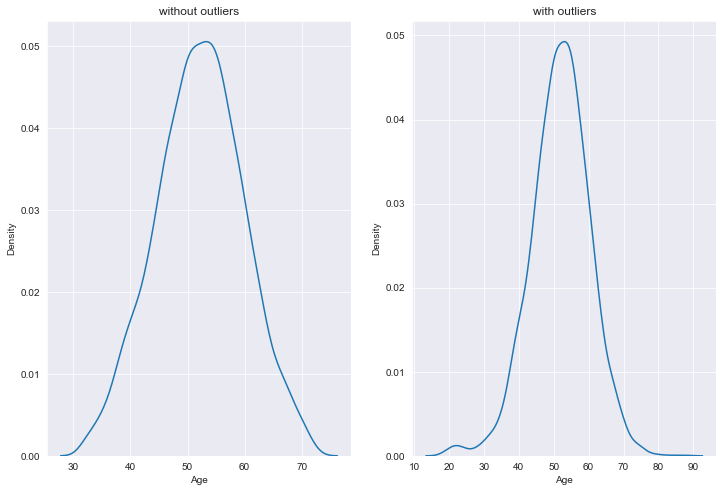

In [36]:
plt.subplot(1,2,1)
sns.kdeplot(filtered['Age']);
plt.title('without outliers')
plt.subplot(1,2,2)
sns.kdeplot(Hr_data['Age']);
plt.title('with outliers')

### EDA /findings from the data, using figures and visualization. 

Male      2504
Female    2457
Name: Gender, dtype: int64

% of Male in the population: 50.47369481959282
% of Female in the population: 49.52630518040718


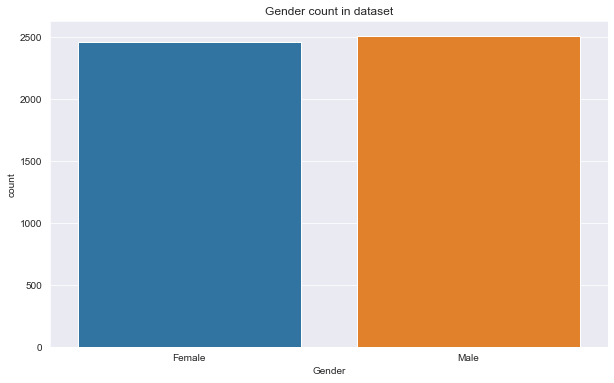

In [37]:
print(Hr_data['Gender'].value_counts());          #prints the value count of respective gender
print("")  #prints empty line
print('% of Male in the population:',(2504*100)/(2504+2457))  #prints the male % in dataset
print('% of Female in the population:',(2457*100)/(2504+2457))#prints the female % in dataset
plt.figure(figsize = (10,6))                                  #figure size
plt.title('Gender count in dataset')                          #title of the plot
sns.countplot(Hr_data['Gender']);                             #countplot of gender using seaborn

Male has a higher percentage population than female, housewives and other responsibility on females could be the possible reason for their low ratio. Though Here the percentage difference is not huge, means this company is good with **diversity**.

In [38]:
pd.crosstab(Hr_data['Gender'],Hr_data['Dependancies']) 
                                        #Using crosstabs to see the relation(in numbers) with gender and dependancies feature.

Dependancies,No,Yes
Gender,,
Female,1748,709
Male,1752,752


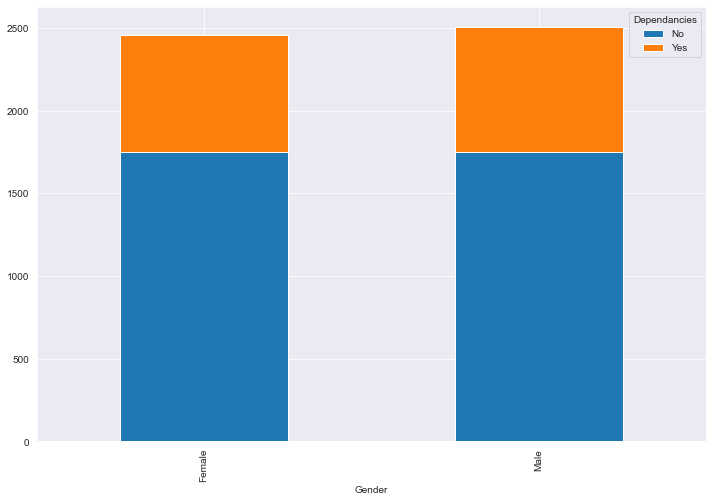

In [39]:
pd.crosstab(Hr_data.Gender, Hr_data.Dependancies).plot.bar(stacked=True);
                                        #Used crosstab and barplot to visualize the dependancies on Gender column.

Here **'not dependant'** on Male and Females are almost same,But **'dependanies'** on Male is higher than female because our Society and family is most dependent on the Male members of the family. Females also have dependants because some of them are working ,some are divorcee etc. and many companies prefers Female over Males to keep a balance on the Gender ratio. 

In [40]:
pd.crosstab(Hr_data['Education'],Hr_data['Gender']) 
                                    #Using crosstabs to see the relation(in numbers) with Education and dependancies feature.

Gender,Female,Male
Education,,
Graduation,993,984
High School or less,5,9
Intermediate,14,12
PG,1445,1499


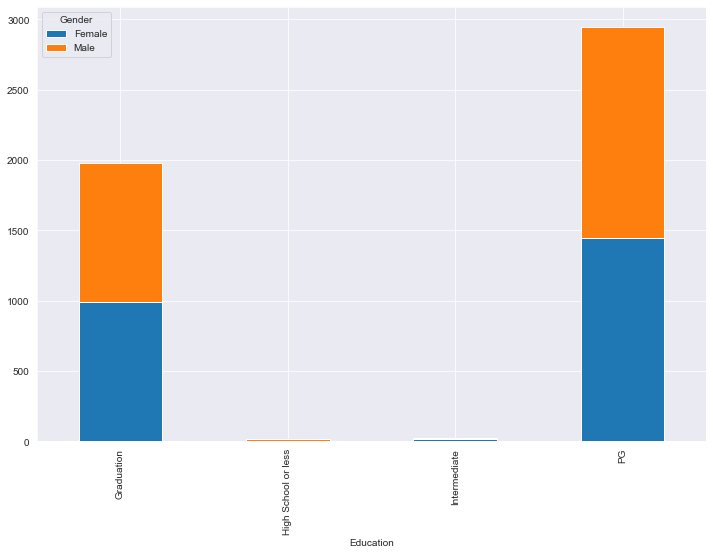

In [41]:
pd.crosstab(Hr_data.Education, Hr_data.Gender).plot.bar(stacked=True);
                                    #Used crosstab and barplot to visualize the dependancies on Education column.

It can be inferred that most of the Male and Female are "PG" degree holders in the company and very few Male and Female have qualification below Graduation.

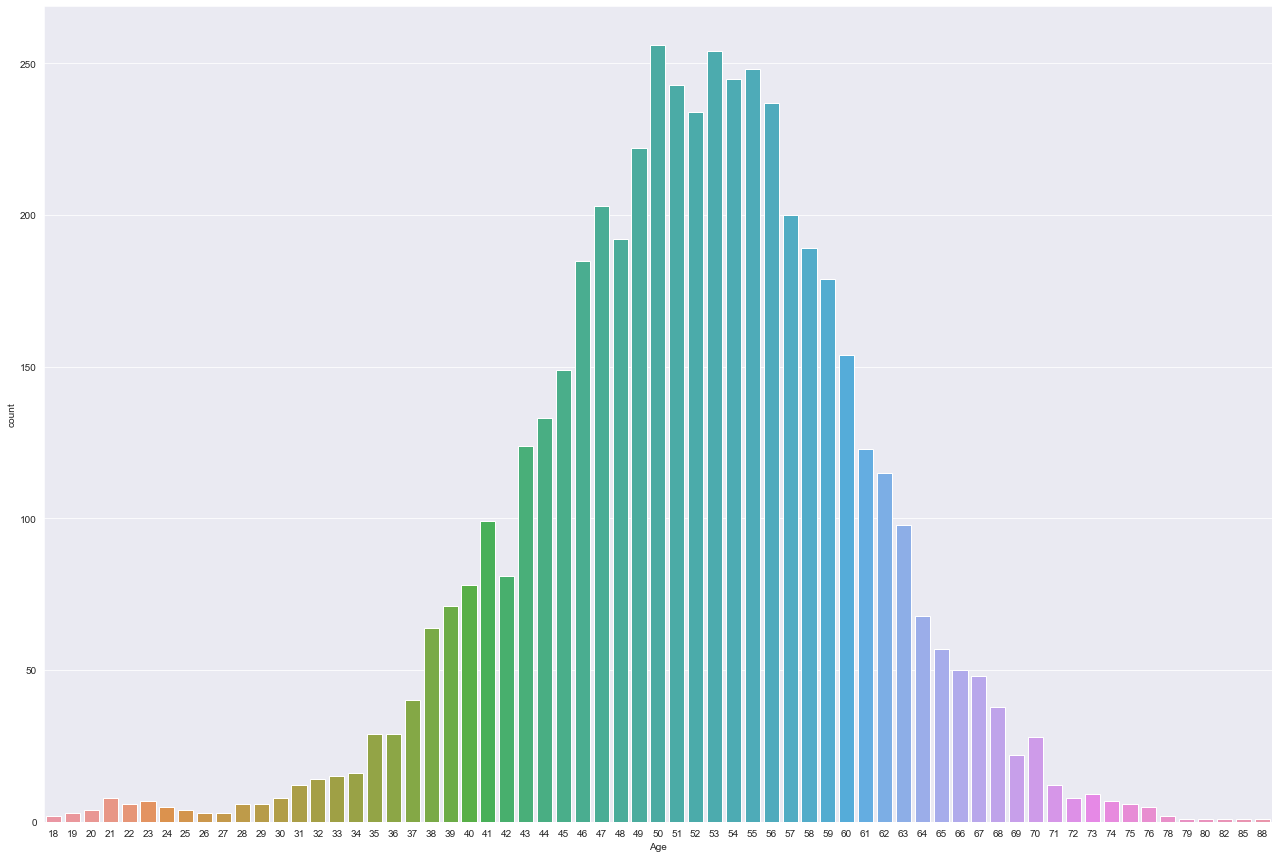

In [42]:
plt.figure(figsize=(22,15))
sns.countplot(Hr_data['Age']); #countplot for Age of employees

Most employee are between 40-63 years of age group and very few are fresher's

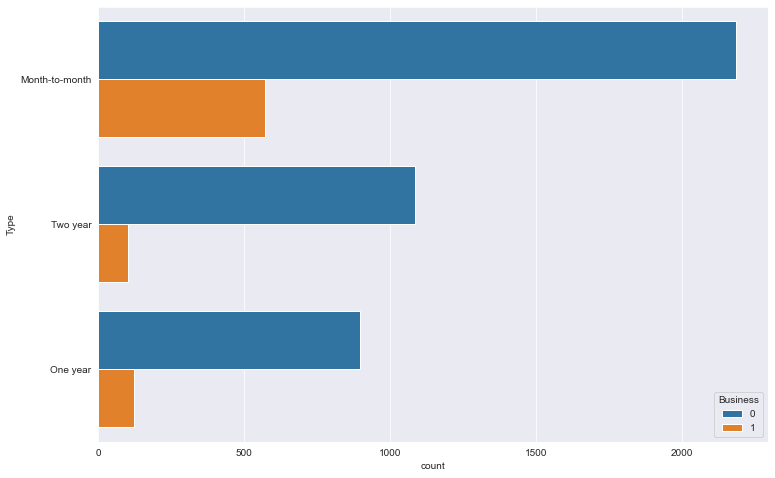

In [43]:
sns.countplot(y='Type',hue='Business',data=Hr_data);             
                                                    #countplot for type of salary and business based on month,year using seaborn

Most people preferred to get **monthly salary** because most of them don't have a business. 2 year and 1 year are mostly contract based ,So their count is also less as compared to month-month and the number of people having business are same in 2 year and one year. 

In [44]:
pd.crosstab(Hr_data.Rating, Hr_data.Gender)        #crosstabs used for ratings vs gender counts .

Gender,Female,Male
Rating,,
No,1792,1859
Yes,665,645


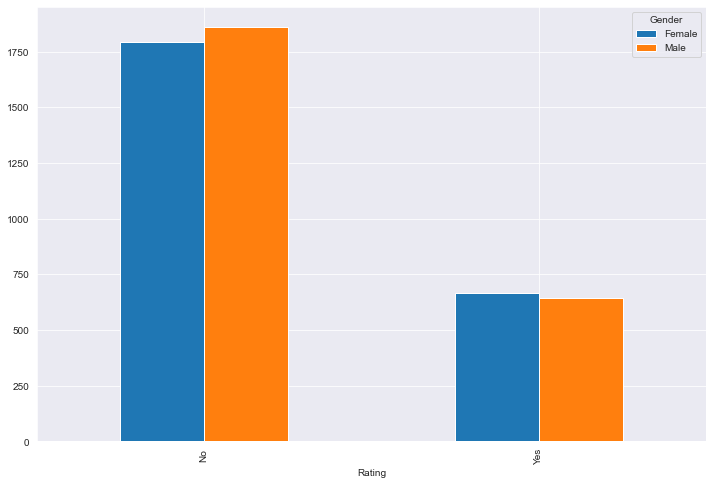

In [45]:
pd.crosstab(Hr_data.Rating,Hr_data.Gender).plot.bar();
                                                   #Used crosstab and barplot to visualize the Rating based on Gender column.

Male persons are getting less Rating for their work from the supervisor, while females are getting ratings because of their productive work for the company.Though the number of persons getting ratings are also less.

In [46]:
Hr_data.groupby('Gender')[['gross_salary']].mean()       #Using groupby to calculate avg salary with respect to gender.

,gross_salary
Gender,
Female,144185.213597
Male,145730.365443


#Here, from the above table Male were getting average Salary higher than a female. Male holding 'PG' degree is more than the Female ,that could be a reason for this difference in the average Salary.

In [47]:
Hr_data.groupby('Rating')[['gross_salary']].mean()       
                               #Using groupby to see the average salary based on if a person is getting rated by the supervisor 

,gross_salary
Rating,
No,144808.897088
Yes,145400.474510


Average Salary of a person who is getting rated by the supervisor is more than who are not getting rated, basically a work appraisal factor.

In [48]:
Hr_data.groupby('Education')[['gross_salary']].mean() 
                               #Using groupby to see the average salary depends on the Education of a person.

,gross_salary
Education,
Graduation,133096.252489
High School or less,11630.729712
Intermediate,12451.300476
PG,154739.826656


**Average Salary of person are in the order of their Education, Higher the Education more be the average salary of a person.
PG  >  Graduation  >  Intermediate  >  High school or less.**

In [49]:
Hr_data.groupby('Dependancies')[['gross_salary']].mean() 
                               #Using groupby to see the average salary based on Depandants or family members.

,gross_salary
Dependancies,
No,144662.440247
Yes,145690.187551


Average salary of the employee who is having dependants is more than those who don't have any dependants.

In [50]:
Hr_data.groupby('Billing')[['gross_salary']].mean()
                               #Using groupby to see the average salary depends on the billing plans or not.

,gross_salary
Billing,
No,144792.787991
Yes,145084.159379


Employee who are having Billing plans have higher average salary compared to those who don't have any billing plans.

In [51]:
Hr_data.head(3)                 #top 3 rows of dataset

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education,gross_salary
0,Female,0,No,Yes,Month-to-month,No,Yes,18,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less,7379.0500
1,Female,0,No,Yes,Month-to-month,No,Yes,19,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less,8262.2740
2,Male,0,No,Yes,Month-to-month,Yes,No,22,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less,8550.1425


In [52]:
from sklearn import preprocessing #importing preprocessing from sklearn
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()  #creating a instance of labelencoder.
Oe = preprocessing.OneHotEncoder()

In [53]:
Hr_data['Gender']=pd.get_dummies(Hr_data['Gender'],drop_first=True) 
#0 as female and 1 as male

In [54]:
Hr_data['Dependancies']=pd.get_dummies(Hr_data['Dependancies'],drop_first=True) 

In [55]:
Hr_data['Calls']=pd.get_dummies(Hr_data['Calls'],drop_first=True)                #transforming calls column using label encoder
Hr_data['Billing']= pd.get_dummies(Hr_data['Billing'],drop_first=True)           #transforming Billing column using label encoder
Hr_data['Rating']= pd.get_dummies(Hr_data['Rating'],drop_first=True)             #transforming rating column using label encoder
Hr_data['Education']= le.fit_transform(Hr_data['Education'])       #transforming Education column using label encoder

In [56]:
Hr_data['Type']= le.fit_transform(Hr_data['Type'])   

In [57]:
Hr_data.head(3)                                 #modified dataset after encoding top 3 rows

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education,gross_salary
0,0,0,0,1,0,0,1,18,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,1,7379.0500
1,0,0,0,1,0,0,1,19,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,1,8262.2740
2,1,0,0,1,0,1,0,22,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,1,8550.1425


In [58]:
Cor=Hr_data.corr()['gross_salary']                     #correlation of salary feature with respect to other features.
Cor.sort_values(ascending=False)                 #sorting in descending order

gross_salary      1.000000
Unit_Sales        0.941940
Total_Sales       0.892906
low               0.817082
Months            0.600749
Unit_Price        0.599257
Education         0.294608
closingbalance    0.290750
Age               0.269682
openingbalance    0.034059
Calls             0.030148
Gender            0.021331
Dependancies      0.012935
Type              0.010842
Rating            0.007201
Billing           0.003955
Business         -0.011446
Volume           -0.210455
Name: gross_salary, dtype: float64

In [59]:
Hr_data.columns                                     #Columns in our dataset

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months',
       'Education', 'gross_salary'],
      dtype='object')

In [60]:
df=Hr_data                                          #creating a copy of Hr_data to df as a checkpoint

In [61]:
df.columns                                          #Columns in our dataset

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months',
       'Education', 'gross_salary'],
      dtype='object')

### Feature Selection 

In [75]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [80]:
from sklearn.tree import ExtraTreeRegressor

[7.55271320e-06 7.04079074e-07 1.60683440e-05 3.31829901e-06
 3.82521789e-06 1.30318883e-05 5.79853072e-06 1.00769978e-03
 7.76866616e-04 1.26097722e-05 1.63092376e-03 3.49217360e-02
 7.13062812e-03 5.77388221e-01 8.25945901e-02 2.94252436e-01
 2.33989911e-04]


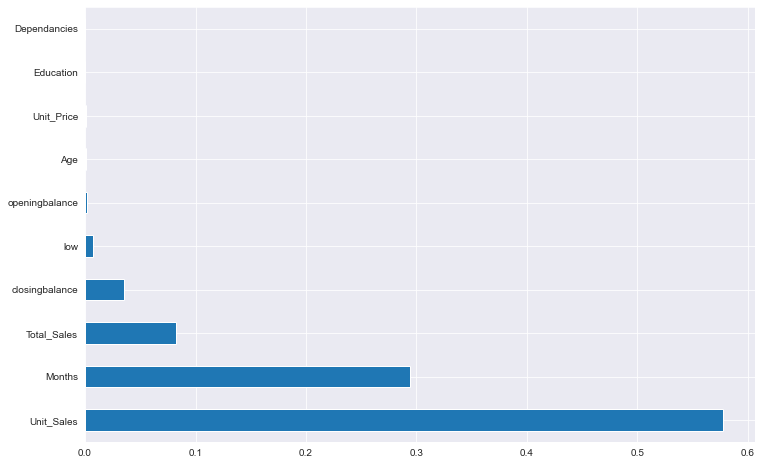

In [142]:
X = df.drop(['gross_salary'],axis=1)         #independent columns
y = df['gross_salary']                       #target column i.e Salary              #importing extratreesregressor
model = ExtraTreeRegressor()          #instancing the model for feature selection
model.fit(X,y)                         #fitting the data into the model
print(model.feature_importances_)      #use inbuilt class feature_importances of tree based regressor
                                       #plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh'); #taking the top 10 important features from the dataset

In [143]:
df.columns

Index(['Gender', 'Business', 'Dependancies', 'Calls', 'Type', 'Billing',
       'Rating', 'Age', 'Unit_Price', 'Volume', 'openingbalance',
       'closingbalance', 'low', 'Unit_Sales', 'Total_Sales', 'Months',
       'Education', 'gross_salary'],
      dtype='object')

We will be moving with Features namely:-low,Unit_Price,Total_Sales,Months,closingbalance,openingbalance,Age.

In [144]:
X=X.values
y=df['gross_salary'].values

In [145]:
from sklearn.model_selection import train_test_split                  #importing traintest split method using sklearn
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0) #setting the test size to 30%
print(X_train.shape) #shape of X_train
print(X_test.shape)  #shape of X_test
print(y_train.shape) #shape of y_train
print(y_test.shape)  #shape of y_test

(3472, 17)
(1489, 17)
(3472,)
(1489,)


In [146]:
from sklearn.preprocessing import MinMaxScaler                     #importing standard scaler to scale the variables 
Scale=MinMaxScaler()                                               #initializing the standard scaler
X_train=Scale.fit_transform(X_train)                                 #fitting our X_train to standard scaler
X_test=Scale.transform(X_test)                                       #fitting X_test to standard scaler

In [147]:
X_train   #X_train values

array([[0.        , 0.        , 0.        , ..., 0.06510501, 0.01388889,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.56479345, 0.79166667,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.31440688, 0.45833333,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.07587699, 0.02777778,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.17429033, 0.22222222,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.19278214, 0.25      ,
        0.        ]])

In [148]:
X_test   #X_test values

array([[1.        , 0.        , 0.        , ..., 0.11479345, 0.08333333,
        1.        ],
       [1.        , 1.        , 0.        , ..., 0.13085622, 0.11111111,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.10771982, 0.06944444,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18408147, 0.23611111,
        1.        ],
       [1.        , 0.        , 1.        , ..., 0.36261251, 0.54166667,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.10354835, 0.05555556,
        1.        ]])

**Linear regression**

In [149]:
from sklearn.linear_model import LinearRegression         #from sklearn importing linear regression
lr = LinearRegression()                                   #initializing the model
lr.fit(X_train, y_train)                                  #fitting the train to the model

LinearRegression()

In [150]:
y_pred = lr.predict(X_test)                               #predicting the test using the model
reg_comparison= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
reg_comparison                                            #created a dataframe for comparison bw actual and predicted

,Actual,Predicted
0,138951.697536,135510.025655
1,141395.955152,141242.108613
2,137658.869354,132239.506276
3,181150.115145,184475.203354
4,128958.108384,120255.700093
...,...,...
1484,152429.283365,152257.434354
1485,99929.022067,96596.153226
1486,149445.050970,156057.882252
1487,165080.433335,168458.382653


In [151]:
from sklearn import metrics #importing metrics from sklearn
def scores(y, y_): #function for score calc.
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X.shape[1]-1)))#adjusted r2 score
    print('r square  ', metrics.r2_score(y, y_))     #calculating r2score using sklearn.metrics

In [152]:
scores(y_test,y_pred)  #the regression score from the model

Adjusted r square:0.9346490193792708
r square   0.9353956367653947


**random forest regressor**

In [93]:
from sklearn.ensemble import RandomForestRegressor  #importing randomforest regressor from sklearn
rvf = RandomForestRegressor()                       #initializing rvf
rvf.fit(X_train, y_train)                           #fitting our model with the train data

RandomForestRegressor()

In [102]:
y_pred = rvf.predict(X_test)                        #prediction using rvf model with test data
#regression score from rvf with test and predicted value

In [103]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 103.65353532052893
Mean Squared Error: 179932.16940476306
Root Mean Squared Error: 424.18412205640493


**svm**

In [104]:
from sklearn.svm import SVR                         #importing svm regressor  from sklearn
sv=SVR()                                            #initializing svr
sv.fit(X_train, y_train)                            #fitting the train data into the model

SVR()

In [105]:
y_pred = sv.predict(X_test)                         #prediction value from test data
#score using the function defined above using metrics

In [110]:
scores(y_test,y_pred)

Adjusted r square:-0.0047113871328423595
r square   0.006767170381444143


In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27486.99656875886
Mean Squared Error: 1254087919.1649258
Root Mean Squared Error: 35413.10377762624


**Xgboost**

In [112]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [113]:
from xgboost import XGBRegressor                    #importing Xgboost regressor from xgboost
from sklearn.model_selection import cross_val_score #cross val score for xgboost tuning
from sklearn.model_selection import RepeatedKFold   #repeat k fold parameter for xgboost
Xgb = XGBRegressor()                                #creating instance of xgboost regressor

In [114]:
Xgb.fit(X_train, y_train)                           #fitting the train data into the Xgboost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [115]:
Y_pred = Xgb.predict(X_test)                       #predicted value from the test data
scores(y_test,Y_pred)                              #r2 and adjusted r2 score from the function of the model

Adjusted r square:0.9997851339298112
r square   0.9997875887169034


In [116]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,Y_pred))

Mean Squared Error: 268197.361265281


In [117]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)      #designing the paramters or tuning
scores = cross_val_score(Xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) #creating scores for Xgb 
scores = np.absolute(scores) #calc scores using numpy from the train data
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) ) # mae error from the model

Mean MAE: 233.270 (31.696)


In [118]:
#result=pd.DataFrame({'Model':['Linear Regression','Random Forest regressor','SVM','Xgboost'],
                # 'Adjusted r2 Score':[0.8646804303571906,0.9999859910269092,0.01957865925373381,0.99992567047246],
                # 'r2 Score':[0.8653405258188628,0.9999860593633633,0.024361202379325375,0.9999260330555211]})
#creating a data frame to show results
#result

**Conclusion**

We can see Here in this Case of Salary prediction using various Ml models ,Randomforest and Xgboost works more efficient because of very powerful algorithm. Also the R2 score and adjusted r2 score is almost same and r2 score is always greater in each case.
The factors effecting the Salary factor on which our Ml model will work are:'Age','closingbalance','low','Total_Sales','Months','Unit_Price'. after deploying we can figure out the best predicted salary according to the features supplied to the model and will give the best salary predicted.

                                                --Thankyou--